# CLASE 5 - ACTIVIDAD

## Algoritmos Árbol de Decisión y K-NN

### Evaluación y comparación de la precisión de los clasificadores generados

Dataset: Cáncer de Mama de Wisconsin (Breast Cancer Wisconsin)

Este dataset viene bien para una introducción porque requiere un preprocesamiento simple, es un problema de clasificación binaria (Maligno vs. Benigno), y tiene buenas características numéricas.

## Importaciones Necesarias para la actividad

Estas son las librerías que se usaran para cargar el dataset, preprocesar los datos y construir/evaluar los modelos:

In [1]:
# Módulos para manejo y preprocesamiento de datos
from sklearn.datasets import load_breast_cancer # Para cargar el dataset
from sklearn.model_selection import train_test_split # Para dividir los datos
from sklearn.preprocessing import StandardScaler # Para escalar las variables (importante para K-NN)

# Importaciones para Métricas y Visualización
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Importación para visualizar el Árbol de Decisión
from sklearn.tree import plot_tree 

# Algoritmos de clasificación
from sklearn.tree import DecisionTreeClassifier # Árbol de Decisión
from sklearn.neighbors import KNeighborsClassifier # K-Vecinos Más Cercanos (K-NN)

# Métrica de evaluación
from sklearn.metrics import accuracy_score # Para calcular la Precisión

# NumPy (siempre útil en ML)
import numpy as np

¿Por qué no use Pandas?

Dado a que no llego con los tiempos, decidí utilizar un dataset (load_breast_cancer) que es parte de los conjuntos de datos "juguete" (toy datasets) de scikit-learn.

    Formato de Datos de Scikit-learn:
        Los toy datasets se cargan como un objeto especial (Bunch) que almacena los datos de las características (X) y la variable objetivo (y) directamente como arreglos de NumPy (numpy.ndarray).
        Ya que scikit-learn está diseñado para trabajar directamente con estos arreglos de NumPy, no hay necesidad de convertirlos a un DataFrame de Pandas para manipularlos o entrenar los modelos, pero igual voy a entrenarlos.

## CARGA DEL DATASET

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

## DIVISION DE LOS DATOS

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## ESCALADO DE CARACTERISTICAS (necesario para K-NN)

   * Este es el único paso de preprocesamiento importante.

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## IMPLEMENTACION Y EVALUACION DEL MODELO

### Definición de parámetros (ajustamos estos para probar)

#### Un valor común e impar para K y una profundidad limitada para evitar el overfitting en el Árbol de decisión

In [14]:
k_value = 5
max_depth_value = 5 

# A. Árbol de decisión

### Instanciar y Entrenar el modelo de Árbol de Decisión
#### El DT usa los datos originales (no escalados), ya que no se basa en distancias.

In [15]:
dt_classifier = DecisionTreeClassifier(max_depth=max_depth_value, random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Predecir y evaluar el Árbol de decisión

In [16]:
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# B. K-Vecinos más cercanos (K-NN)

### Instanciar y Entrenar el modelo K-NN
#### K-NN DEBE usar los datos escalados (X_train_scaled, X_test_scaled)

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Predecir y evaluar el K-NN

In [18]:
y_pred_knn = knn_classifier.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# C. Mostrar resultados para comparación

In [19]:
print("--- Resultados de la Comparación ---")
print(f"Precisión del Árbol de Decisión (max_depth={max_depth_value}): {accuracy_dt:.4f}")
print(f"Precisión de K-NN (k={k_value}): {accuracy_knn:.4f}")

if accuracy_dt > accuracy_knn:
    print("\nConclusión: El Árbol de Decisión obtuvo la mayor precisión.")
elif accuracy_knn > accuracy_dt:
    print("\nConclusión: K-NN obtuvo la mayor precisión.")
else:
    print("\nConclusión: Ambos modelos obtuvieron la misma precisión.")

--- Resultados de la Comparación ---
Precisión del Árbol de Decisión (max_depth=5): 0.9532
Precisión de K-NN (k=5): 0.9591

Conclusión: K-NN obtuvo la mayor precisión.


## Generación de métricas detalladas y matrices de confusión


========== Informe de Clasificación - Árbol de Decisión ==========
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



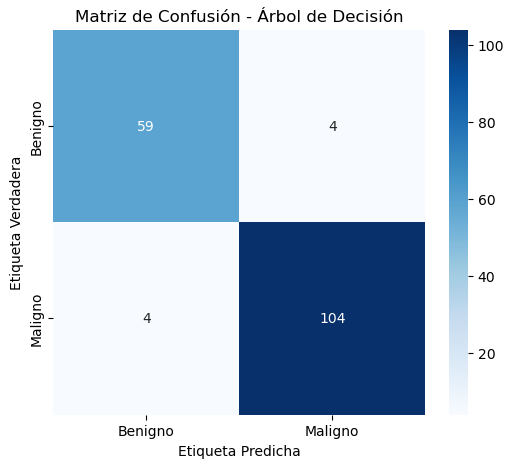


========== Informe de Clasificación - K-NN ==========
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



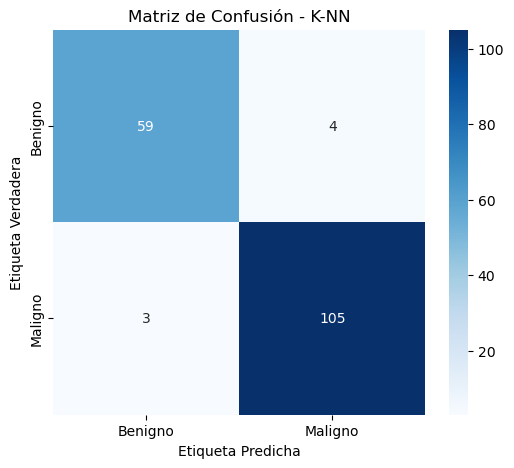

In [27]:
# Árbol de Decisión
print("\n========== Informe de Clasificación - Árbol de Decisión ==========")
print(classification_report(y_test, y_pred_dt))

# Matriz de confusión para Árbol de Decisión
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benigno', 'Maligno'], 
            yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.savefig('matriz_dt.png')
plt.show()

# K-NN
print("\n========== Informe de Clasificación - K-NN ==========")
# Nota: La evaluación de K-NN usa y_test y las predicciones en datos escalados
print(classification_report(y_test, y_pred_knn)) 

# Matriz de confusión para K-NN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'], 
            yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusión - K-NN')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.savefig('matriz_k-nn.png')
plt.show()

## Visualización del Árbol de Decisión

### La visualización del árbol ayuda a entender su lógica de decisión.

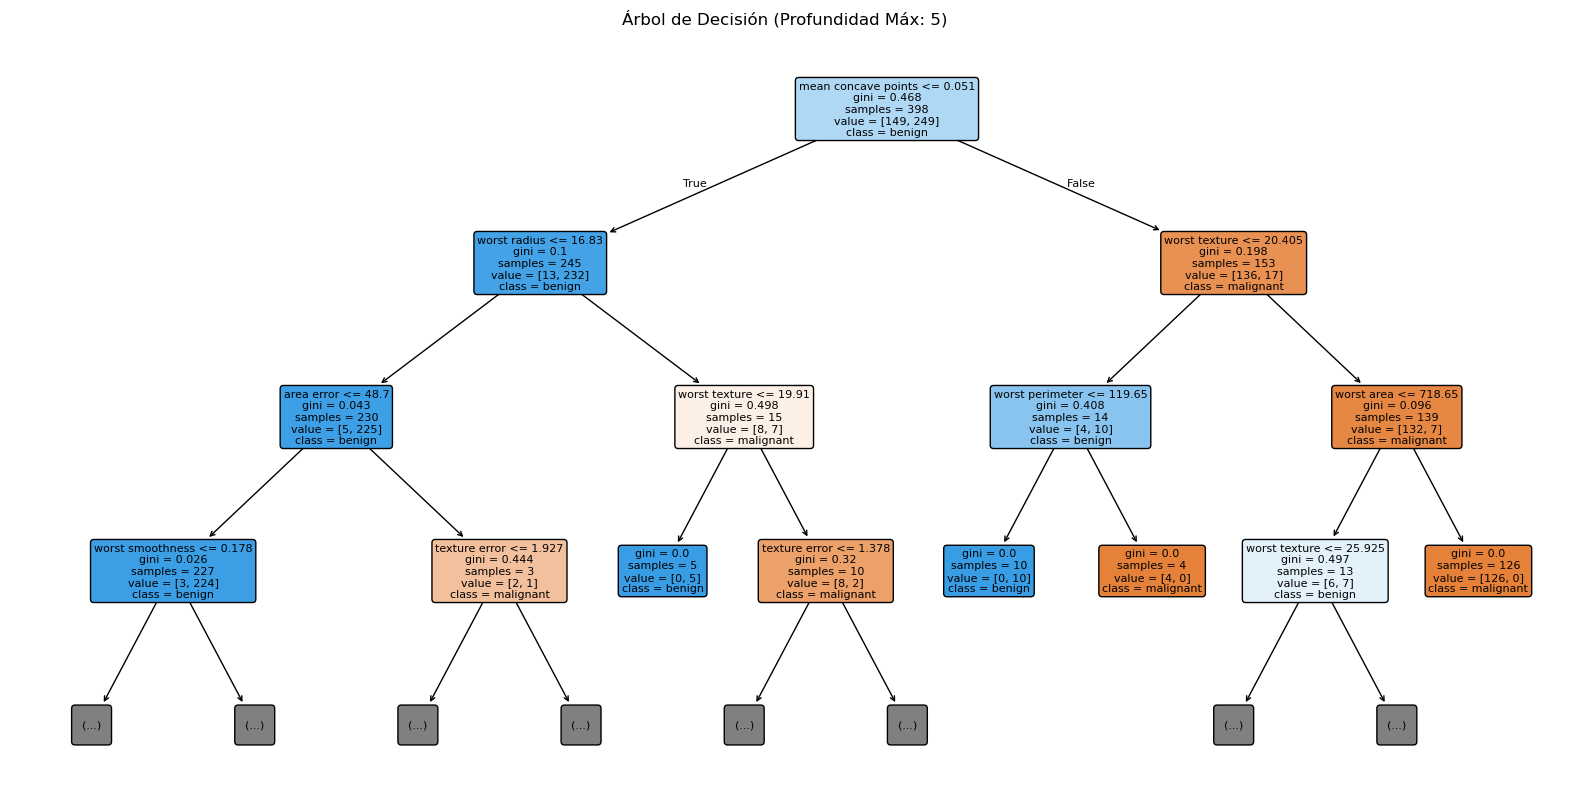

In [25]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, 
          filled=True, 
          rounded=True, 
          class_names=data.target_names.astype(str), # Nombres de las clases (Maligno/Benigno)
          feature_names=data.feature_names,          # Nombres de las características
          max_depth=3,                               # Limita la visualización a una profundidad manejable
          fontsize=8)
plt.title(f'Árbol de Decisión (Profundidad Máx: {dt_classifier.get_depth()})')
plt.savefig('arbol.png')
plt.show()

## Visualización de Fronteras de decisión K-NN

### La visualización de fronteras de decisión es genial, pero el dataset de Cáncer de Mama tiene 30 dimensiones. Para poder graficar las fronteras, se debe usar una técnica de reducción de dimensionalidad o simplemente graficar solo dos características principales.

### Lo más sencillo es usar las primeras dos componentes principales (si estuvieran transformadas) o, en este caso, elegir solo dos características para ver el comportamiento del clasificador en un plano 2D. Sin embargo, para no complicar el análisis con PCA, es recomendado omitir la frontera de decisión por ahora y enfocarte en las métricas y la visualización del árbol, que ya añaden mucho valor.

Código que proyecta los datos usando las dos primeras características:

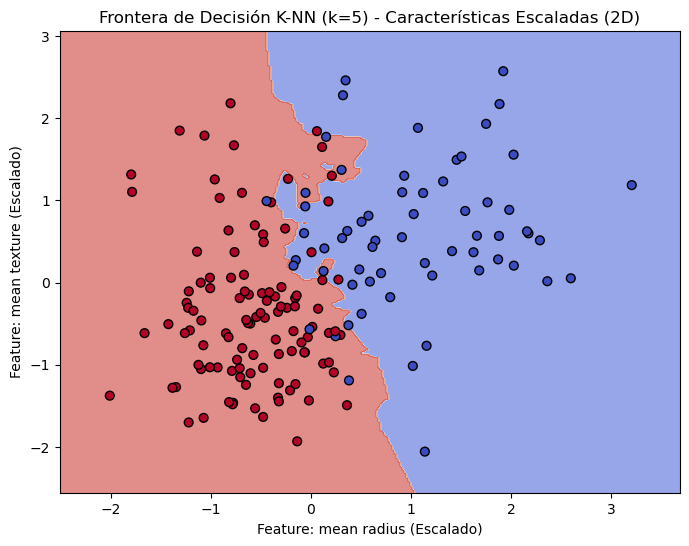

In [26]:
# F. Visualización de la Frontera de Decisión para K-NN (2D)

# 1. Seleccionar solo las dos primeras características para el gráfico (Índices 0 y 1)
X_plot = X_test[:, :2] 
y_plot = y_test

# 2. ESCALADO: Es fundamental escalar solo las dos características seleccionadas 
# para que la distancia sea significativa en el modelo K-NN temporal.
scaler_plot = StandardScaler()
X_plot_scaled = scaler_plot.fit_transform(X_plot)

# 3. Definir el área del gráfico (malla de puntos)
x_min, x_max = X_plot_scaled[:, 0].min() - 0.5, X_plot_scaled[:, 0].max() + 0.5
y_min, y_max = X_plot_scaled[:, 1].min() - 0.5, X_plot_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 4. Entrenar el modelo K-NN temporal con las 2 características ESCALADAS
model_knn_plot = KNeighborsClassifier(n_neighbors=k_value)
model_knn_plot.fit(X_plot_scaled, y_plot)

# 5. Predecir en la malla de puntos para dibujar la frontera
Z_knn = model_knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

# 6. Generar el gráfico de la frontera de decisión
plt.figure(figsize=(8, 6))
# Dibujar la frontera de decisión (fondo de colores)
plt.contourf(xx, yy, Z_knn, alpha=0.6, cmap=plt.cm.coolwarm)

# Dibujar los puntos de datos de prueba
plt.scatter(X_plot_scaled[:, 0], X_plot_scaled[:, 1], c=y_plot, s=40, 
            edgecolor='k', cmap=plt.cm.coolwarm, marker='o')

plt.title(f'Frontera de Decisión K-NN (k={k_value}) - Características Escaladas (2D)')
plt.xlabel(f'Feature: {data.feature_names[0]} (Escalado)')
plt.ylabel(f'Feature: {data.feature_names[1]} (Escalado)')
plt.savefig('frontera de decision k-nn.png')

plt.show()